# 🚀 Day 14/100 of #100DaysOfCode
# 🎯 Project: Kaggle Dataset EDA (End-to-End)  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/titanic.csv")

In [2]:
# 1. Quick Overview
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [3]:
# 2. Handle Missing Values

# Fill 'age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [4]:
# 3. Data Cleaning & Encoding

# Encode 'Sex' and 'Embarked'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

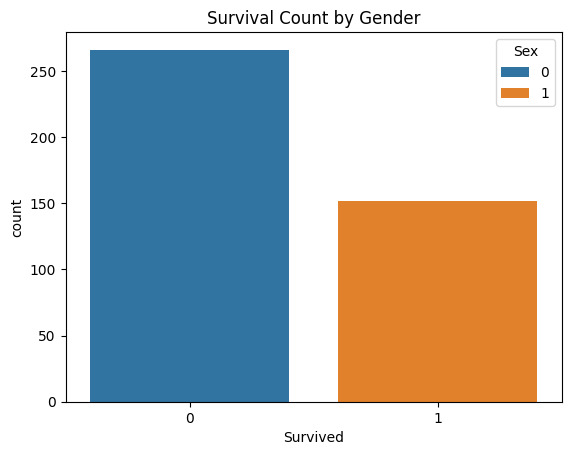

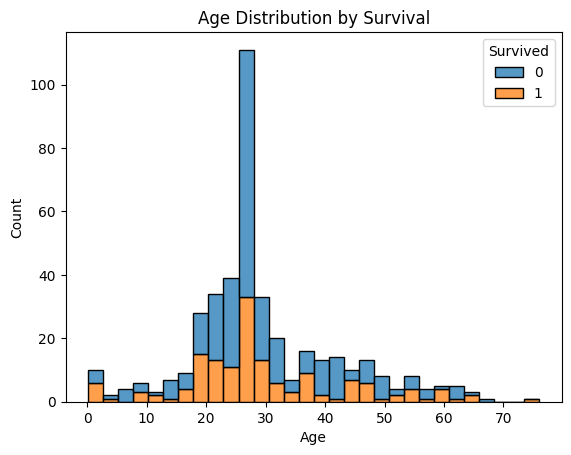

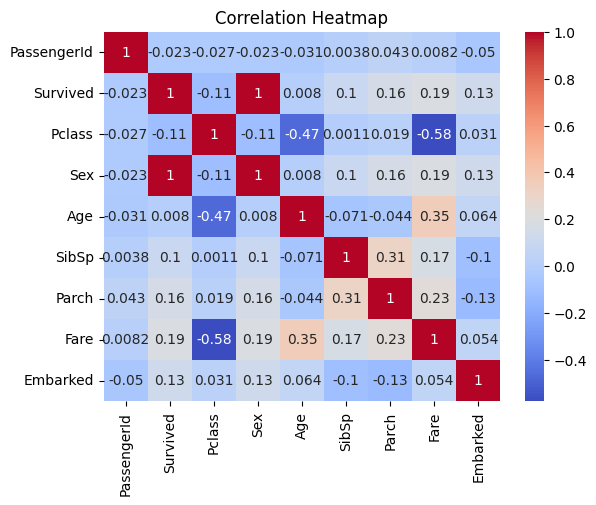

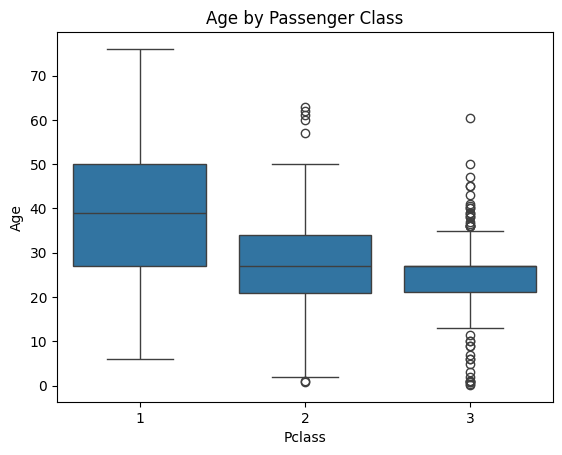

In [5]:
# 4. Exploratory Data Analysis

# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.show()

# Heatmap of correlations
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot: Age by Passenger Class
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Passenger Class')
plt.show()

In [6]:
# 5. Insights
print("\nSurvival Rate by Class and Gender:")
print(df.groupby(['Pclass', 'Sex'])['Survived'].mean())

print("\nAverage Fare by Embarkation Port:")
print(df.groupby('Embarked')['Fare'].mean())


Survival Rate by Class and Gender:
Pclass  Sex
1       0      0.0
        1      1.0
2       0      0.0
        1      1.0
3       0      0.0
        1      1.0
Name: Survived, dtype: float64

Average Fare by Embarkation Port:
Embarked
0    28.230436
1    66.259765
2    10.957700
Name: Fare, dtype: float64


In [7]:
# Save survival rate by class and gender to CSV
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_rate.to_csv('../output/survival_rate_by_class.csv', index=False)

print("\nSaved survival rate by class and gender to: output/survival_rate_by_class.csv")


Saved survival rate by class and gender to: output/survival_rate_by_class.csv
